<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - Take Home



---
#### Guidelines 
- This is your notebook for your take home midterm. 
- This part of your midterm, as you might expect, is **more challenging** so I highly recommend you to work ASAP. 

- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, cause your answers will be considered invalid = **0%**).
- The take home is **15%** of your total midterm score.
- You can work in groups of no more than **3** students.
- Your code **should not be the same** as the rest of your classmates we will check (trust me on this!!), if your code is the same as any of your classmate **your grade will be penalized.**
- The take home is due on **March 20** before class/exam (if you are taking the in-class exam before the rest of the class, you **need** to push your take home part before you commence with the in-class exam) = **NO EXCUSES !!**
- Use this [link][1] to **submit/include** the GitHub link to your take home exam.
[1]: https://docs.google.com/forms/d/e/1FAIpQLSfLkZJY80tw303ss8Ga_2sUMVgumAppWb4tYwssGTbr879_Mw/viewform "link"
- If you find a piece of code online (from someone else), and you decide to use in your midterm, you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
- Finally, you don't need to 
---

#### The data

The state of Iowa provides many data sets on their website, we will be using a dataset which contains transactions for all stores that have a class E liquor license. 

The data , data dictionary can be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

**However,** since many of you may have had computer issues reading medium size datasets, **everyone** needs to use the 10% dataset version of Iowa liquor sales, located in your dataset folder. 

---

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Load the data from file

---

In [2]:
df=pd.read_csv('/Users/lilexin/Desktop/ECON628-lessdaa/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv')

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [3]:
df.head(5)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [4]:
df.describe()
#missing value in 'Catefory' and 'County Number'

/Users/lilexin/anaconda2/envs/econ/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
count,270955.000000,269878.000000,2.708870e+05,270955.00000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,3590.263701,57.231642,1.043888e+06,256.43443,45974.963300,924.830341,9.871285,8.981351,2.372830
std,947.662050,27.341205,5.018211e+04,141.01489,52757.043086,493.088489,24.040912,28.913690,7.638182
min,2106.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,1.000000,0.100000,0.030000
25%,2604.000000,NaN,NaN,115.00000,26827.000000,750.000000,2.000000,1.500000,0.400000
50%,3722.000000,NaN,NaN,260.00000,38176.000000,750.000000,6.000000,5.250000,1.390000
75%,4378.000000,NaN,NaN,380.00000,64573.000000,1000.000000,12.000000,10.500000,2.770000
max,9023.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,2508.000000,2508.000000,662.540000


In [5]:

df.dtypes
   

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

### Variable 'State bottle Cost' and 'State Bottle Rentail' are not in float type, as well as 'Sale'.

In [6]:
df.info

<bound method DataFrame.info of               Date  Store Number             City Zip Code  County Number  \
0       11/04/2015          3717           SUMNER    50674            9.0   
1       03/02/2016          2614        DAVENPORT    52807           82.0   
2       02/11/2016          2106      CEDAR FALLS    50613            7.0   
3       02/03/2016          2501             AMES    50010           85.0   
4       08/18/2015          3654          BELMOND    50421           99.0   
5       04/20/2015          2569     CEDAR RAPIDS    52402           57.0   
6       08/05/2015          2596          OTTUMWA    52501           90.0   
7       06/25/2015          3456       CLEAR LAKE    50428           17.0   
8       01/04/2016          4757        BONDURANT    50035           77.0   
9       11/10/2015          4346       SHELLSBURG    52332            6.0   
10      09/28/2015          2648  WEST DES MOINES    50265           77.0   
11      10/28/2015          2600        OSKA

In [7]:
df.shape

(270955, 18)


## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [8]:
#Since there are dollar signs in serials:'State Bottle Cost', 'State Bottle Rentail' and 'Sale', convert in into float
df["State Bottle Cost"]=df['State Bottle Cost'].str.replace('$','')
df["State Bottle Cost"]=pd.to_numeric(df["State Bottle Cost"])
    


df["State Bottle Retail"]=df['State Bottle Retail'].str.replace('$','')
df["State Bottle Retail"]=pd.to_numeric(df["State Bottle Retail"])

df["Sale (Dollars)"]=df['Sale (Dollars)'].str.replace('$','')
df["Sale (Dollars)"]=pd.to_numeric(df["Sale (Dollars)"])

df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


In [9]:
df.dtypes #Check the data type again

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

### 3.2 Clean the columns

In [10]:
df.drop(['Zip Code','Item Description','County','Volume Sold (Liters)'], axis=1,inplace=True)
df.head(5)

,Date,Store Number,City,County Number,Category,Category Name,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,9.0,1051100.0,APRICOT BRANDIES,55,54436,750,4.50,6.75,12,81.00,2.38
1,03/02/2016,2614,DAVENPORT,82.0,1011100.0,BLENDED WHISKIES,395,27605,750,13.75,20.63,2,41.26,0.40
2,02/11/2016,2106,CEDAR FALLS,7.0,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,1000,12.59,18.89,24,453.36,6.34
3,02/03/2016,2501,AMES,85.0,1071100.0,AMERICAN COCKTAILS,395,59154,1750,9.50,14.25,6,85.50,2.77
4,08/18/2015,3654,BELMOND,99.0,1031080.0,VODKA 80 PROOF,297,35918,1750,7.20,10.80,12,129.60,5.55



### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life when dealing with data. This isn't a kind of programming where things are just right or wrong.

In [11]:
#First Check outliers
df.describe()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Gallons)
count,270955.000000,269878.000000,2.708870e+05,270955.00000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,3590.263701,57.231642,1.043888e+06,256.43443,45974.963300,924.830341,9.773281,14.675760,9.871285,128.902375,2.372830
std,947.662050,27.341205,5.018211e+04,141.01489,52757.043086,493.088489,7.047119,10.570145,24.040912,383.027369,7.638182
min,2106.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,0.890000,1.340000,1.000000,1.340000,0.030000
25%,2604.000000,NaN,NaN,115.00000,26827.000000,750.000000,5.500000,8.270000,2.000000,30.450000,0.400000
50%,3722.000000,NaN,NaN,260.00000,38176.000000,750.000000,8.000000,12.270000,6.000000,70.560000,1.390000
75%,4378.000000,NaN,NaN,380.00000,64573.000000,1000.000000,11.920000,17.880000,12.000000,135.000000,2.770000
max,9023.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,425.000000,637.500000,2508.000000,36392.400000,662.540000


In [12]:
#I copy this function from internet: It will drop the outliers, which lies 'twice of mean value' away from the mean.
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

In [13]:
df['Item Number']=reject_outliers(df['Item Number'])
df['Bottle Volume (ml)']=reject_outliers(df['Bottle Volume (ml)'])
df['Bottles Sold']=reject_outliers(df['Bottles Sold'])
df['Sale (Dollars)']=reject_outliers(df['Sale (Dollars)'])
df['Volume Sold (Gallons)']=reject_outliers(df['Volume Sold (Gallons)'])

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store Number,270955.0,3.590264e+03,947.662050,2106.00,2604.00,3722.00,4378.00,9023.00
County Number,269878.0,5.723164e+01,27.341205,1.00,NaN,NaN,NaN,99.00
Category,270887.0,1.043888e+06,50182.111075,1011100.00,NaN,NaN,NaN,1701100.00
Vendor Number,270955.0,2.564344e+02,141.014890,10.00,115.00,260.00,380.00,978.00
Item Number,270161.0,4.340936e+04,23306.219288,168.00,NaN,NaN,NaN,89946.00
Bottle Volume (ml),269193.0,9.112329e+02,464.265689,50.00,NaN,NaN,NaN,1750.00
State Bottle Cost,270955.0,9.773281e+00,7.047119,0.89,5.50,8.00,11.92,425.00
State Bottle Retail,270955.0,1.467576e+01,10.570145,1.34,8.27,12.27,17.88,637.50
Bottles Sold,267208.0,8.100918e+00,8.112771,1.00,NaN,NaN,NaN,57.00
Sale (Dollars),267759.0,1.016538e+02,106.659287,1.34,NaN,NaN,NaN,894.60



## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [14]:
#Locate thoes data with "NaN', and create a Dataframe for obs with NaN.
df2=df[df.isnull().values==True]
df2

#Bottle Volume (ml),Bottles Sold,Sale (Dollars) and Volume Sold (Gallons) have missing value

,Date,Store Number,City,County Number,Category,Category Name,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Gallons)
61,11/30/2015,4892,DAVENPORT,82.0,1081600.0,WHISKEY LIQUEUR,421,64858.0,NaN,29.72,44.58,1.0,44.58,0.79
69,12/09/2015,3879,SIOUX CITY,97.0,1081200.0,CREAM LIQUEURS,260,68039.0,NaN,28.71,43.07,4.0,172.28,2.54
101,12/09/2015,4631,CEDAR FALLS,7.0,1081600.0,WHISKEY LIQUEUR,421,64858.0,NaN,29.72,44.58,2.0,89.16,1.59
113,03/16/2015,2512,IOWA CITY,52.0,1062310.0,SPICED RUM,260,43336.0,750.0,9.00,13.50,NaN,810.00,11.89
135,01/20/2016,5222,CEDAR RAPIDS,NaN,1051010.0,AMERICAN GRAPE BRANDIES,115,53214.0,375.0,3.22,4.83,24.0,115.92,2.38
144,10/15/2015,2616,CLINTON,23.0,1081400.0,TRIPLE SEC,65,86112.0,1000.0,2.33,3.50,NaN,210.00,15.85
163,06/22/2015,4021,FAIRFIELD,51.0,1081600.0,WHISKEY LIQUEUR,421,64858.0,NaN,29.72,44.58,2.0,89.16,1.59
186,10/19/2015,4180,MARION,57.0,1081600.0,WHISKEY LIQUEUR,421,64858.0,NaN,29.72,44.58,2.0,89.16,1.59
198,03/02/2016,3820,SIOUX CITY,NaN,1032080.0,IMPORTED VODKA,35,34359.0,200.0,5.00,7.50,12.0,90.00,0.63
272,03/21/2016,4222,EVANSDALE,NaN,1062300.0,FLAVORED RUM,370,42716.0,750.0,7.49,11.24,3.0,33.72,0.59


In [15]:
df3=df[['Store Number','County Number']]
print df3.count()
#Check the amount of County Number missing 

Store Number     270955
County Number    269878
dtype: int64


In [16]:

df_Lost = df[df['County Number'].isnull().values == True]
df_Re = df.dropna(axis=0).drop_duplicates(['Store Number'])
df_Re.head()
#df_Re give us the aviable relationship from Store NUmber to County Number, That can save some data

,Date,Store Number,City,County Number,Category,Category Name,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,9.0,1051100.0,APRICOT BRANDIES,55,54436.0,750.0,4.50,6.75,12.0,81.00,2.38
1,03/02/2016,2614,DAVENPORT,82.0,1011100.0,BLENDED WHISKIES,395,27605.0,750.0,13.75,20.63,2.0,41.26,0.40
2,02/11/2016,2106,CEDAR FALLS,7.0,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067.0,1000.0,12.59,18.89,24.0,453.36,6.34
3,02/03/2016,2501,AMES,85.0,1071100.0,AMERICAN COCKTAILS,395,59154.0,1750.0,9.50,14.25,6.0,85.50,2.77
4,08/18/2015,3654,BELMOND,99.0,1031080.0,VODKA 80 PROOF,297,35918.0,1750.0,7.20,10.80,12.0,129.60,5.55


In [17]:
for index, row in df_Lost.iterrows():
        i = df_Re.loc[df_Re['Store Number'] == row['Store Number']]['County Number']
        if i.size == 1:
                df.set_value(index, 'County Number', i.irow(0))
#We are tring to fix thoese County Number missing, with the for loop(if the County Number of a store is not in data_Re, it can not be fixed.
#We drop Thoese stores later



/Users/lilexin/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: irow(i) is deprecated. Please use .iloc[i] or .iat[i]


In [18]:
df_After_Fix=df[['Store Number','County Number']]
print df_After_Fix.count()
#There are still data missing

Store Number     270955
County Number    270527
dtype: int64


In [19]:
df=df[df_After_Fix['County Number'].notnull().values==True]
df.count()

Date                     270527
Store Number             270527
City                     270527
County Number            270527
Category                 270459
Category Name            269905
Vendor Number            270527
Item Number              269733
Bottle Volume (ml)       268766
State Bottle Cost        270527
State Bottle Retail      270527
Bottles Sold             266781
Sale (Dollars)           267335
Volume Sold (Gallons)    268018
dtype: int64

### So far, I was tring to save as much ddata as possible, but I can't fix thoese missing value in other variables. So we fill the null with mean value.

In [20]:
df['Category']=df['Category'].fillna(df['Category'].mean())
df['Item Number']=df['Item Number'].fillna(df['Item Number'].mean())
df['Bottle Volume (ml)']=df['Bottle Volume (ml)'].fillna(df['Bottle Volume (ml)'].mean())
df['Bottles Sold']=df['Bottles Sold'].fillna(df['Bottles Sold'].mean())
df['Sale (Dollars)']=df['Sale (Dollars)'].fillna(df['Sale (Dollars)'].mean())
df['Volume Sold (Gallons)']=df['Volume Sold (Gallons)'].fillna(df['Volume Sold (Gallons)'].mean())
df.count()

/Users/lilexin/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/lilexin/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/lilexin/anaconda2/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

Date                     270527
Store Number             270527
City                     270527
County Number            270527
Category                 270527
Category Name            269905
Vendor Number            270527
Item Number              270527
Bottle Volume (ml)       270527
State Bottle Cost        270527
State Bottle Retail      270527
Bottles Sold             270527
Sale (Dollars)           270527
Volume Sold (Gallons)    270527
dtype: int64

In [21]:
df.count()
df2=df[df.isnull().values==True]
df2.head()

,Date,Store Number,City,County Number,Category,Category Name,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Gallons)
896,02/05/2015,4829,DES MOINES,77.0,1.022200e+06,NaN,85,3657.000000,750.0,23.58,35.37,6.000000,212.220000,1.19
901,02/25/2016,4647,WATERLOO,7.0,1.052100e+06,NaN,420,48099.000000,200.0,5.74,8.61,24.000000,206.640000,1.27
1514,02/18/2016,2515,MASON CITY,17.0,1.082100e+06,NaN,420,67487.000000,750.0,23.31,34.97,2.000000,69.940000,0.40
1684,02/08/2016,3747,SIGOURNEY,54.0,1.052100e+06,NaN,420,48106.000000,750.0,18.99,28.49,2.000000,56.980000,0.40
2203,02/16/2016,4589,SIBLEY,72.0,1.032100e+06,NaN,115,34821.000000,1750.0,14.74,22.11,2.000000,44.220000,0.92
2894,02/09/2016,2413,DUBUQUE,31.0,1.082100e+06,NaN,130,64136.000000,750.0,13.86,20.79,12.000000,249.480000,2.38
3071,02/15/2016,2539,IOWA FALLS,42.0,1.052100e+06,NaN,420,48106.000000,750.0,18.99,28.49,3.000000,85.470000,0.59
3482,02/10/2016,3524,AMES,85.0,1.032100e+06,NaN,115,34821.000000,1750.0,14.74,22.11,6.000000,132.660000,2.77
4596,02/03/2016,2594,SIOUX CITY,97.0,1.052100e+06,NaN,420,48099.000000,200.0,5.74,8.61,1.000000,8.610000,0.05
4989,02/23/2016,2620,WINDSOR HEIGHTS,77.0,1.091100e+06,NaN,208,27439.000000,750.0,17.50,26.25,6.000000,157.500000,1.19



## 5. Case 1 - Proposals for new tax rates 

---

You are an economist working for the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [22]:
df5=df
    
        

In [23]:
df5_1=df5.groupby('Store Number').sum()
df5_1.head()

,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Gallons)
Store Number,,,,,,,,,,
2106,4578.0,686214527.0,175772,3.102857e+07,597350.00000,6753.92,10138.83,9662.336355,137792.199438,2483.739623
2113,17296.0,191207086.0,43223,8.195266e+06,175625.00000,1994.22,2993.26,830.000000,11376.120000,221.030000
2130,3563.0,532692074.0,129922,2.435644e+07,472197.97932,5099.22,7651.68,7006.527541,97561.681891,1727.859686
2152,2907.0,178028775.0,40771,6.760500e+06,181500.00000,1461.46,2198.51,709.000000,9097.510000,204.290000
2178,885.0,307983172.0,70428,1.320056e+07,302875.00000,2833.94,4257.50,2408.000000,29912.680000,623.797484


In [24]:
df5_2=df5_1.drop(['County Number','Category','Vendor Number','Item Number','Bottle Volume (ml)','State Bottle Cost','Bottles Sold','State Bottle Retail','Volume Sold (Gallons)'],axis=1)
df5_2.head(10)

,Sale (Dollars)
Store Number,
2106,137792.199438
2113,11376.120000
2130,97561.681891
2152,9097.510000
2178,29912.680000
2190,137972.262832
2191,98745.350759
2200,26986.420000
2205,24681.390000


##### 

### 5.2 Calculate the profit each store is making in 2015.


In [25]:
Profit=pd.Series

In [26]:
Profit=(df['State Bottle Retail']-df['State Bottle Cost'])*df['Bottles Sold']
Profit.name='Profit'
print Profit


0          27.00
1          13.76
2         151.20
3          28.50
4          43.20
5          39.96
6           9.99
7          15.76
8          23.00
9           7.62
10         78.72
11         19.50
12          4.46
13         60.00
14         45.00
15          9.00
16         27.36
17         39.00
18         59.04
19         29.94
20         14.26
21         31.44
22         42.00
23         63.00
24         20.28
25        214.80
26          3.68
27          5.25
28         33.00
29          2.45
           ...  
270925     12.00
270926     93.00
270927     55.56
270928     43.20
270929      7.16
270930     11.64
270931     31.56
270932     29.68
270933     13.50
270934     10.00
270935     22.62
270936     63.00
270937      9.28
270938      7.14
270939     14.70
270940     24.08
270941     21.54
270942     33.12
270943      3.42
270944      4.76
270945     21.60
270946     19.32
270947     15.00
270948     12.75
270949      6.21
270950     40.60
270951     11.22
270952     45.

In [27]:
df5_3=pd.concat([df, Profit], axis=1)
df5_3.head(5)

,Date,Store Number,City,County Number,Category,Category Name,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Gallons),Profit
0,11/04/2015,3717,SUMNER,9.0,1051100.0,APRICOT BRANDIES,55,54436.0,750.0,4.50,6.75,12.0,81.00,2.38,27.00
1,03/02/2016,2614,DAVENPORT,82.0,1011100.0,BLENDED WHISKIES,395,27605.0,750.0,13.75,20.63,2.0,41.26,0.40,13.76
2,02/11/2016,2106,CEDAR FALLS,7.0,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067.0,1000.0,12.59,18.89,24.0,453.36,6.34,151.20
3,02/03/2016,2501,AMES,85.0,1071100.0,AMERICAN COCKTAILS,395,59154.0,1750.0,9.50,14.25,6.0,85.50,2.77,28.50
4,08/18/2015,3654,BELMOND,99.0,1031080.0,VODKA 80 PROOF,297,35918.0,1750.0,7.20,10.80,12.0,129.60,5.55,43.20


In [28]:
df5_4=df5_3.groupby('Store Number').sum()


In [29]:
df5_4.head(5)

,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Gallons),Profit
Store Number,,,,,,,,,,,
2106,4578.0,686214527.0,175772,3.102857e+07,597350.00000,6753.92,10138.83,9662.336355,137792.199438,2483.739623,47040.377303
2113,17296.0,191207086.0,43223,8.195266e+06,175625.00000,1994.22,2993.26,830.000000,11376.120000,221.030000,3802.530000
2130,3563.0,532692074.0,129922,2.435644e+07,472197.97932,5099.22,7651.68,7006.527541,97561.681891,1727.859686,35099.122392
2152,2907.0,178028775.0,40771,6.760500e+06,181500.00000,1461.46,2198.51,709.000000,9097.510000,204.290000,3048.970000
2178,885.0,307983172.0,70428,1.320056e+07,302875.00000,2833.94,4257.50,2408.000000,29912.680000,623.797484,10034.460000


In [30]:
df5_5=df5_4.drop(['County Number','Category','Vendor Number','Item Number','Bottle Volume (ml)','State Bottle Cost','Bottles Sold','State Bottle Retail','Volume Sold (Gallons)'],axis=1)


In [31]:
df5_5.head()

,Sale (Dollars),Profit
Store Number,,
2106,137792.199438,47040.377303
2113,11376.120000,3802.530000
2130,97561.681891,35099.122392
2152,9097.510000,3048.970000
2178,29912.680000,10034.460000


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [32]:
df5=df5_3

In [33]:
df5.head()

,Date,Store Number,City,County Number,Category,Category Name,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Gallons),Profit
0,11/04/2015,3717,SUMNER,9.0,1051100.0,APRICOT BRANDIES,55,54436.0,750.0,4.50,6.75,12.0,81.00,2.38,27.00
1,03/02/2016,2614,DAVENPORT,82.0,1011100.0,BLENDED WHISKIES,395,27605.0,750.0,13.75,20.63,2.0,41.26,0.40,13.76
2,02/11/2016,2106,CEDAR FALLS,7.0,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067.0,1000.0,12.59,18.89,24.0,453.36,6.34,151.20
3,02/03/2016,2501,AMES,85.0,1071100.0,AMERICAN COCKTAILS,395,59154.0,1750.0,9.50,14.25,6.0,85.50,2.77,28.50
4,08/18/2015,3654,BELMOND,99.0,1031080.0,VODKA 80 PROOF,297,35918.0,1750.0,7.20,10.80,12.0,129.60,5.55,43.20


In [34]:
df5_1=df5.groupby('County Number').sum()

In [35]:
df5_1.head()


,Store Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Gallons),Profit
County Number,,,,,,,,,,,
1.0,2426271,6.082550e+08,163360,2.462975e+07,5.932500e+05,5446.93,8180.15,4537.202203,54333.623774,1134.957484,17961.763129
2.0,544518,2.439048e+08,63216,1.013231e+07,2.381000e+05,2377.94,3569.26,955.000000,12441.710000,258.930000,4150.990000
3.0,3813362,1.092013e+09,267640,4.644203e+07,1.101736e+06,10419.95,15646.13,7214.404407,96032.511321,1992.972453,31982.277658
4.0,3557780,1.098175e+09,270345,4.574391e+07,1.000105e+06,9940.54,14929.02,7056.707712,87022.978869,1732.377422,29056.476640
5.0,984183,2.380548e+08,58639,9.636766e+06,2.329500e+05,1982.02,2977.61,1526.303305,18682.263774,396.654969,5935.276603


In [36]:
Per_Gallon_Profit=pd.Series
Per_Gallon_Profit=(df5_1['Profit'])/(df5_1['Volume Sold (Gallons)'])
Per_Gallon_Profit.name='Per_Gallon_Profit'
df5_2=pd.concat([df5_1,Per_Gallon_Profit],axis=1)

In [37]:
df5_2.head()

,Store Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Gallons),Profit,Per_Gallon_Profit
County Number,,,,,,,,,,,,
1.0,2426271,6.082550e+08,163360,2.462975e+07,5.932500e+05,5446.93,8180.15,4537.202203,54333.623774,1134.957484,17961.763129,15.825935
2.0,544518,2.439048e+08,63216,1.013231e+07,2.381000e+05,2377.94,3569.26,955.000000,12441.710000,258.930000,4150.990000,16.031321
3.0,3813362,1.092013e+09,267640,4.644203e+07,1.101736e+06,10419.95,15646.13,7214.404407,96032.511321,1992.972453,31982.277658,16.047526
4.0,3557780,1.098175e+09,270345,4.574391e+07,1.000105e+06,9940.54,14929.02,7056.707712,87022.978869,1732.377422,29056.476640,16.772602
5.0,984183,2.380548e+08,58639,9.636766e+06,2.329500e+05,1982.02,2977.61,1526.303305,18682.263774,396.654969,5935.276603,14.963323


In [38]:
df5_3=df5_2.sort_values(by='Per_Gallon_Profit')
df5_3.head(1)


,Store Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Gallons),Profit,Per_Gallon_Profit
County Number,,,,,,,,,,,,
41.0,1469173,377198060.0,84493,14074356.0,442125.0,3267.89,4914.53,3239.101102,37014.84,956.6,12368.104135,12.929233


County Number 41 is Hancock

### 5.4  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [39]:
df5=df

In [40]:
Profit=(df5['State Bottle Retail']-df5['State Bottle Cost'])*df5['Bottles Sold']
Profit.name='Profit'
df5_1=pd.concat([df5,Profit],axis=1)
df5_2=df5_1.groupby('Store Number').sum()

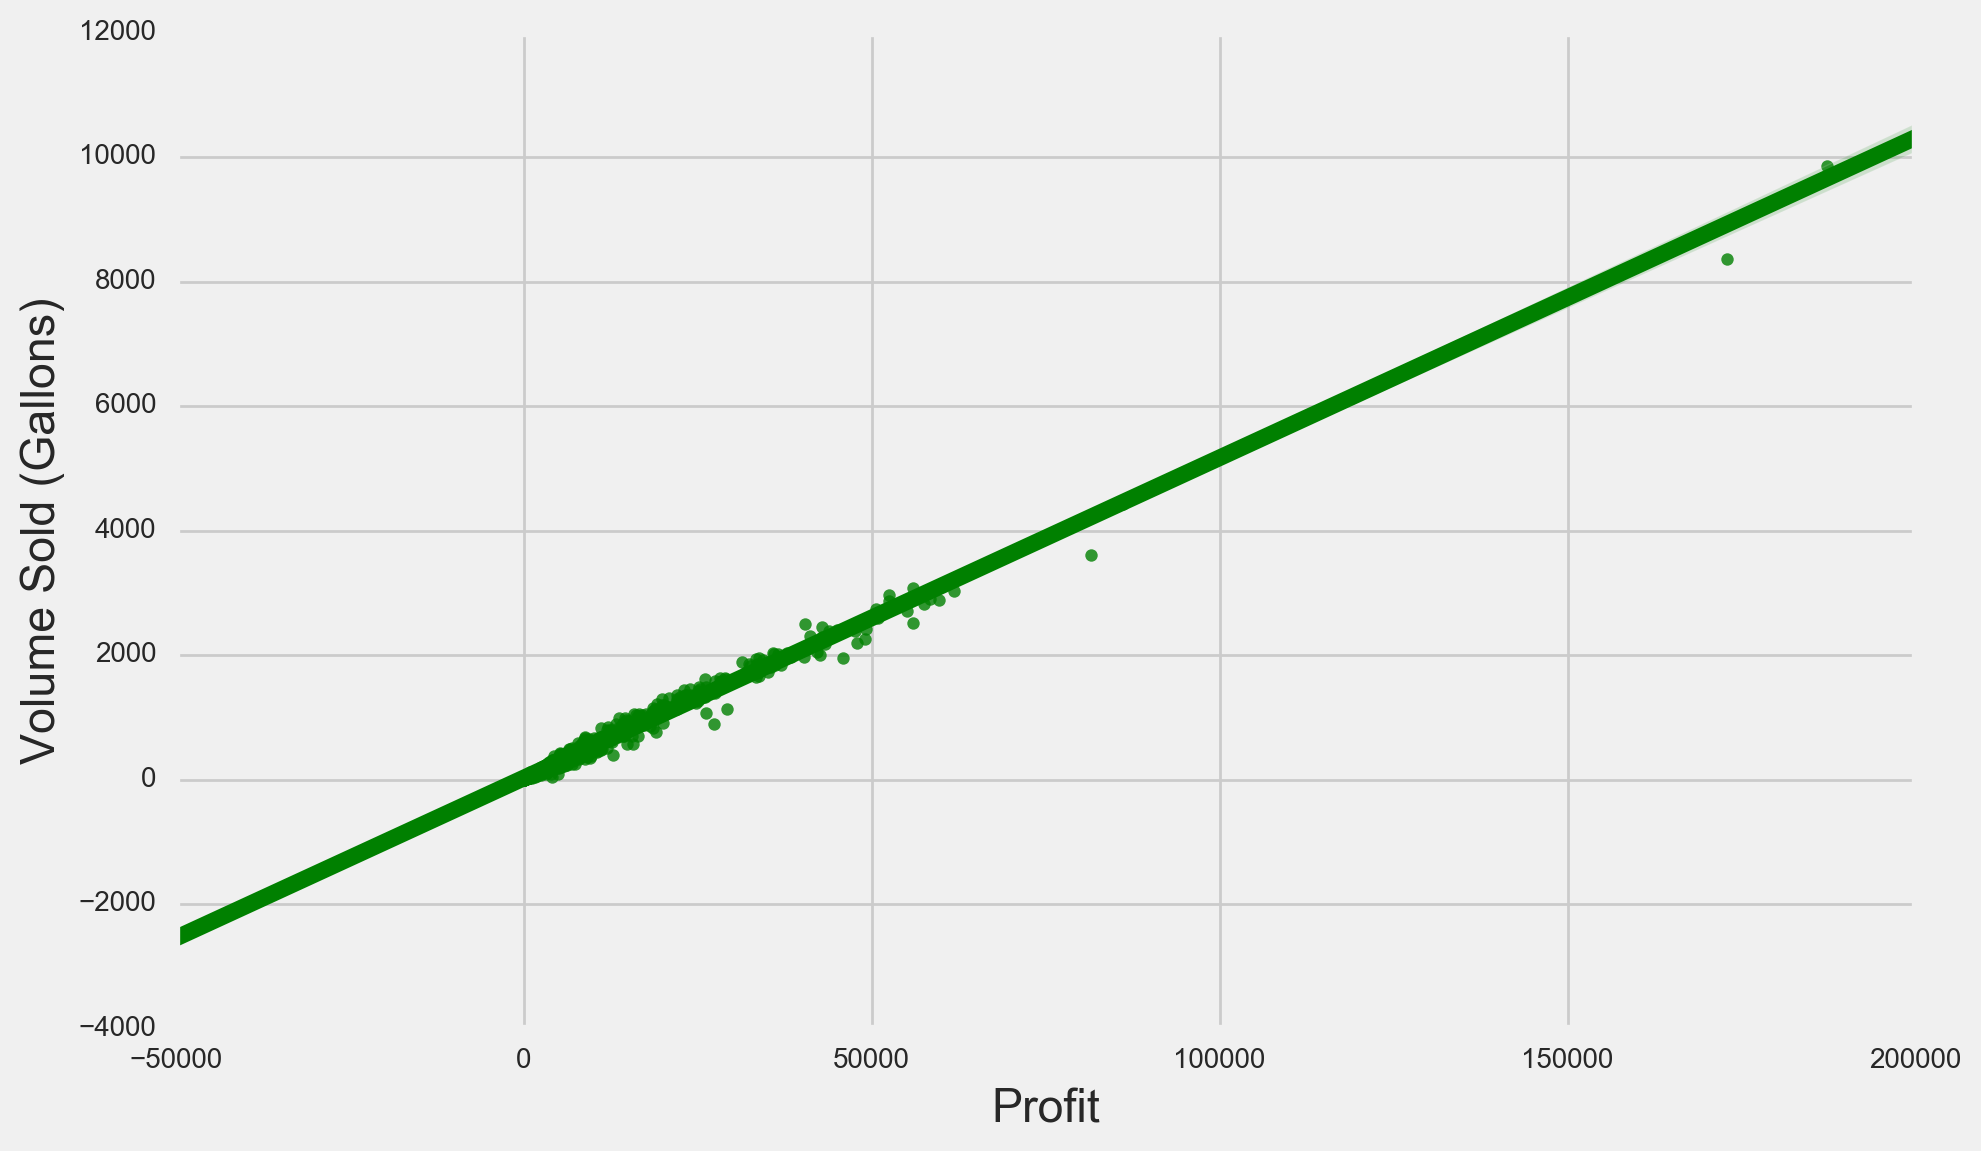

In [41]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

sns.regplot(df5_2['Profit'],
            df5_2['Volume Sold (Gallons)'], color='green',)

### Positive relationship between profit and the store scale

### 5.5 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [42]:
df5=df

In [43]:
df5.head()


,Date,Store Number,City,County Number,Category,Category Name,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,9.0,1051100.0,APRICOT BRANDIES,55,54436.0,750.0,4.50,6.75,12.0,81.00,2.38
1,03/02/2016,2614,DAVENPORT,82.0,1011100.0,BLENDED WHISKIES,395,27605.0,750.0,13.75,20.63,2.0,41.26,0.40
2,02/11/2016,2106,CEDAR FALLS,7.0,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067.0,1000.0,12.59,18.89,24.0,453.36,6.34
3,02/03/2016,2501,AMES,85.0,1071100.0,AMERICAN COCKTAILS,395,59154.0,1750.0,9.50,14.25,6.0,85.50,2.77
4,08/18/2015,3654,BELMOND,99.0,1031080.0,VODKA 80 PROOF,297,35918.0,1750.0,7.20,10.80,12.0,129.60,5.55


In [44]:
Category=df5['Category Name'].str.lower()
Category.name='Category Name'
dfa=df5.drop(['Category Name'],axis=1)
dfb=pd.concat([dfa,Category],axis=1)
dfb
# Change into lower case for better looking

,Date,Store Number,City,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Gallons),Category Name
0,11/04/2015,3717,SUMNER,9.0,1051100.0,55,54436.0,750.0,4.50,6.75,12.0,81.00,2.38,apricot brandies
1,03/02/2016,2614,DAVENPORT,82.0,1011100.0,395,27605.0,750.0,13.75,20.63,2.0,41.26,0.40,blended whiskies
2,02/11/2016,2106,CEDAR FALLS,7.0,1011200.0,65,19067.0,1000.0,12.59,18.89,24.0,453.36,6.34,straight bourbon whiskies
3,02/03/2016,2501,AMES,85.0,1071100.0,395,59154.0,1750.0,9.50,14.25,6.0,85.50,2.77,american cocktails
4,08/18/2015,3654,BELMOND,99.0,1031080.0,297,35918.0,1750.0,7.20,10.80,12.0,129.60,5.55,vodka 80 proof
5,04/20/2015,2569,CEDAR RAPIDS,57.0,1041100.0,205,31473.0,1750.0,13.32,19.98,6.0,119.88,2.77,american dry gins
6,08/05/2015,2596,OTTUMWA,90.0,1051010.0,85,52806.0,750.0,6.66,9.99,3.0,29.97,0.59,american grape brandies
7,06/25/2015,3456,CLEAR LAKE,17.0,1012100.0,65,10628.0,1750.0,15.75,23.63,2.0,47.26,0.92,canadian whiskies
8,01/04/2016,4757,BONDURANT,77.0,1032080.0,370,34006.0,750.0,11.49,17.24,4.0,68.96,0.79,imported vodka
9,11/10/2015,4346,SHELLSBURG,6.0,1081315.0,65,82610.0,1000.0,7.62,11.43,2.0,22.86,0.53,cinnamon schnapps


In [45]:

df5_0=dfb.groupby('Category Name').sum()
df5_0
# It is for knowing the number of category names, we got 71 great.

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Gallons)
Category Name,,,,,,,,,,,
100 proof vodka,12350340,194689.0,3.404692e+09,1027572,1.224805e+08,3.690100e+06,19290.08,28950.05,30936.527541,2.487945e+05,8567.142327
amaretto - imported,6760,181.0,3.246030e+06,1491,1.302246e+05,2.250000e+03,93.39,140.10,48.000000,1.222484e+03,9.520000
american alcohol,1995912,31980.0,6.309303e+08,238279,2.446838e+07,4.297500e+05,5077.12,7615.88,5709.101102,7.578315e+04,1144.760000
american amaretto,4550684,74000.0,1.452877e+09,495131,1.018756e+08,1.250300e+06,6084.78,9130.14,10496.000000,6.718450e+04,2561.090000
american cocktails,23127762,396002.0,7.403443e+09,1866294,4.109474e+08,1.079990e+07,49607.71,74739.69,42304.380421,4.652390e+05,16991.318808
american dry gins,23316394,371732.0,6.817123e+09,2019926,2.045090e+08,6.494025e+06,38663.75,58061.43,55113.751778,4.121378e+05,11798.742139
american grape brandies,24709550,370699.0,6.910391e+09,1210449,3.466724e+08,4.374725e+06,35711.86,53651.97,67847.661693,4.269454e+05,8941.412265
american sloe gins,592051,9044.0,1.749216e+08,72784,5.682938e+06,1.425000e+05,842.11,1263.66,797.000000,6.097090e+03,183.000000
anisette,121996,1955.0,3.783570e+07,14821,2.943152e+06,2.625000e+04,165.75,248.78,138.000000,9.845800e+02,27.400000


### 5.6 Do relationships exist between the broader liquor type and profit?


### 5.7 Are there any noticeable relationships between liquor brand and sales? Profit?

In [46]:
df5_a=df5_0.drop(['Store Number','County Number','Vendor Number','Category','Item Number','Bottle Volume (ml)','State Bottle Cost','State Bottle Retail','Bottles Sold','Volume Sold (Gallons)'],axis=1)
df5_a.head()



,Sale (Dollars)
Category Name,
100 proof vodka,248794.540190
amaretto - imported,1222.483774
american alcohol,75783.153774
american amaretto,67184.500000
american cocktails,465238.959818


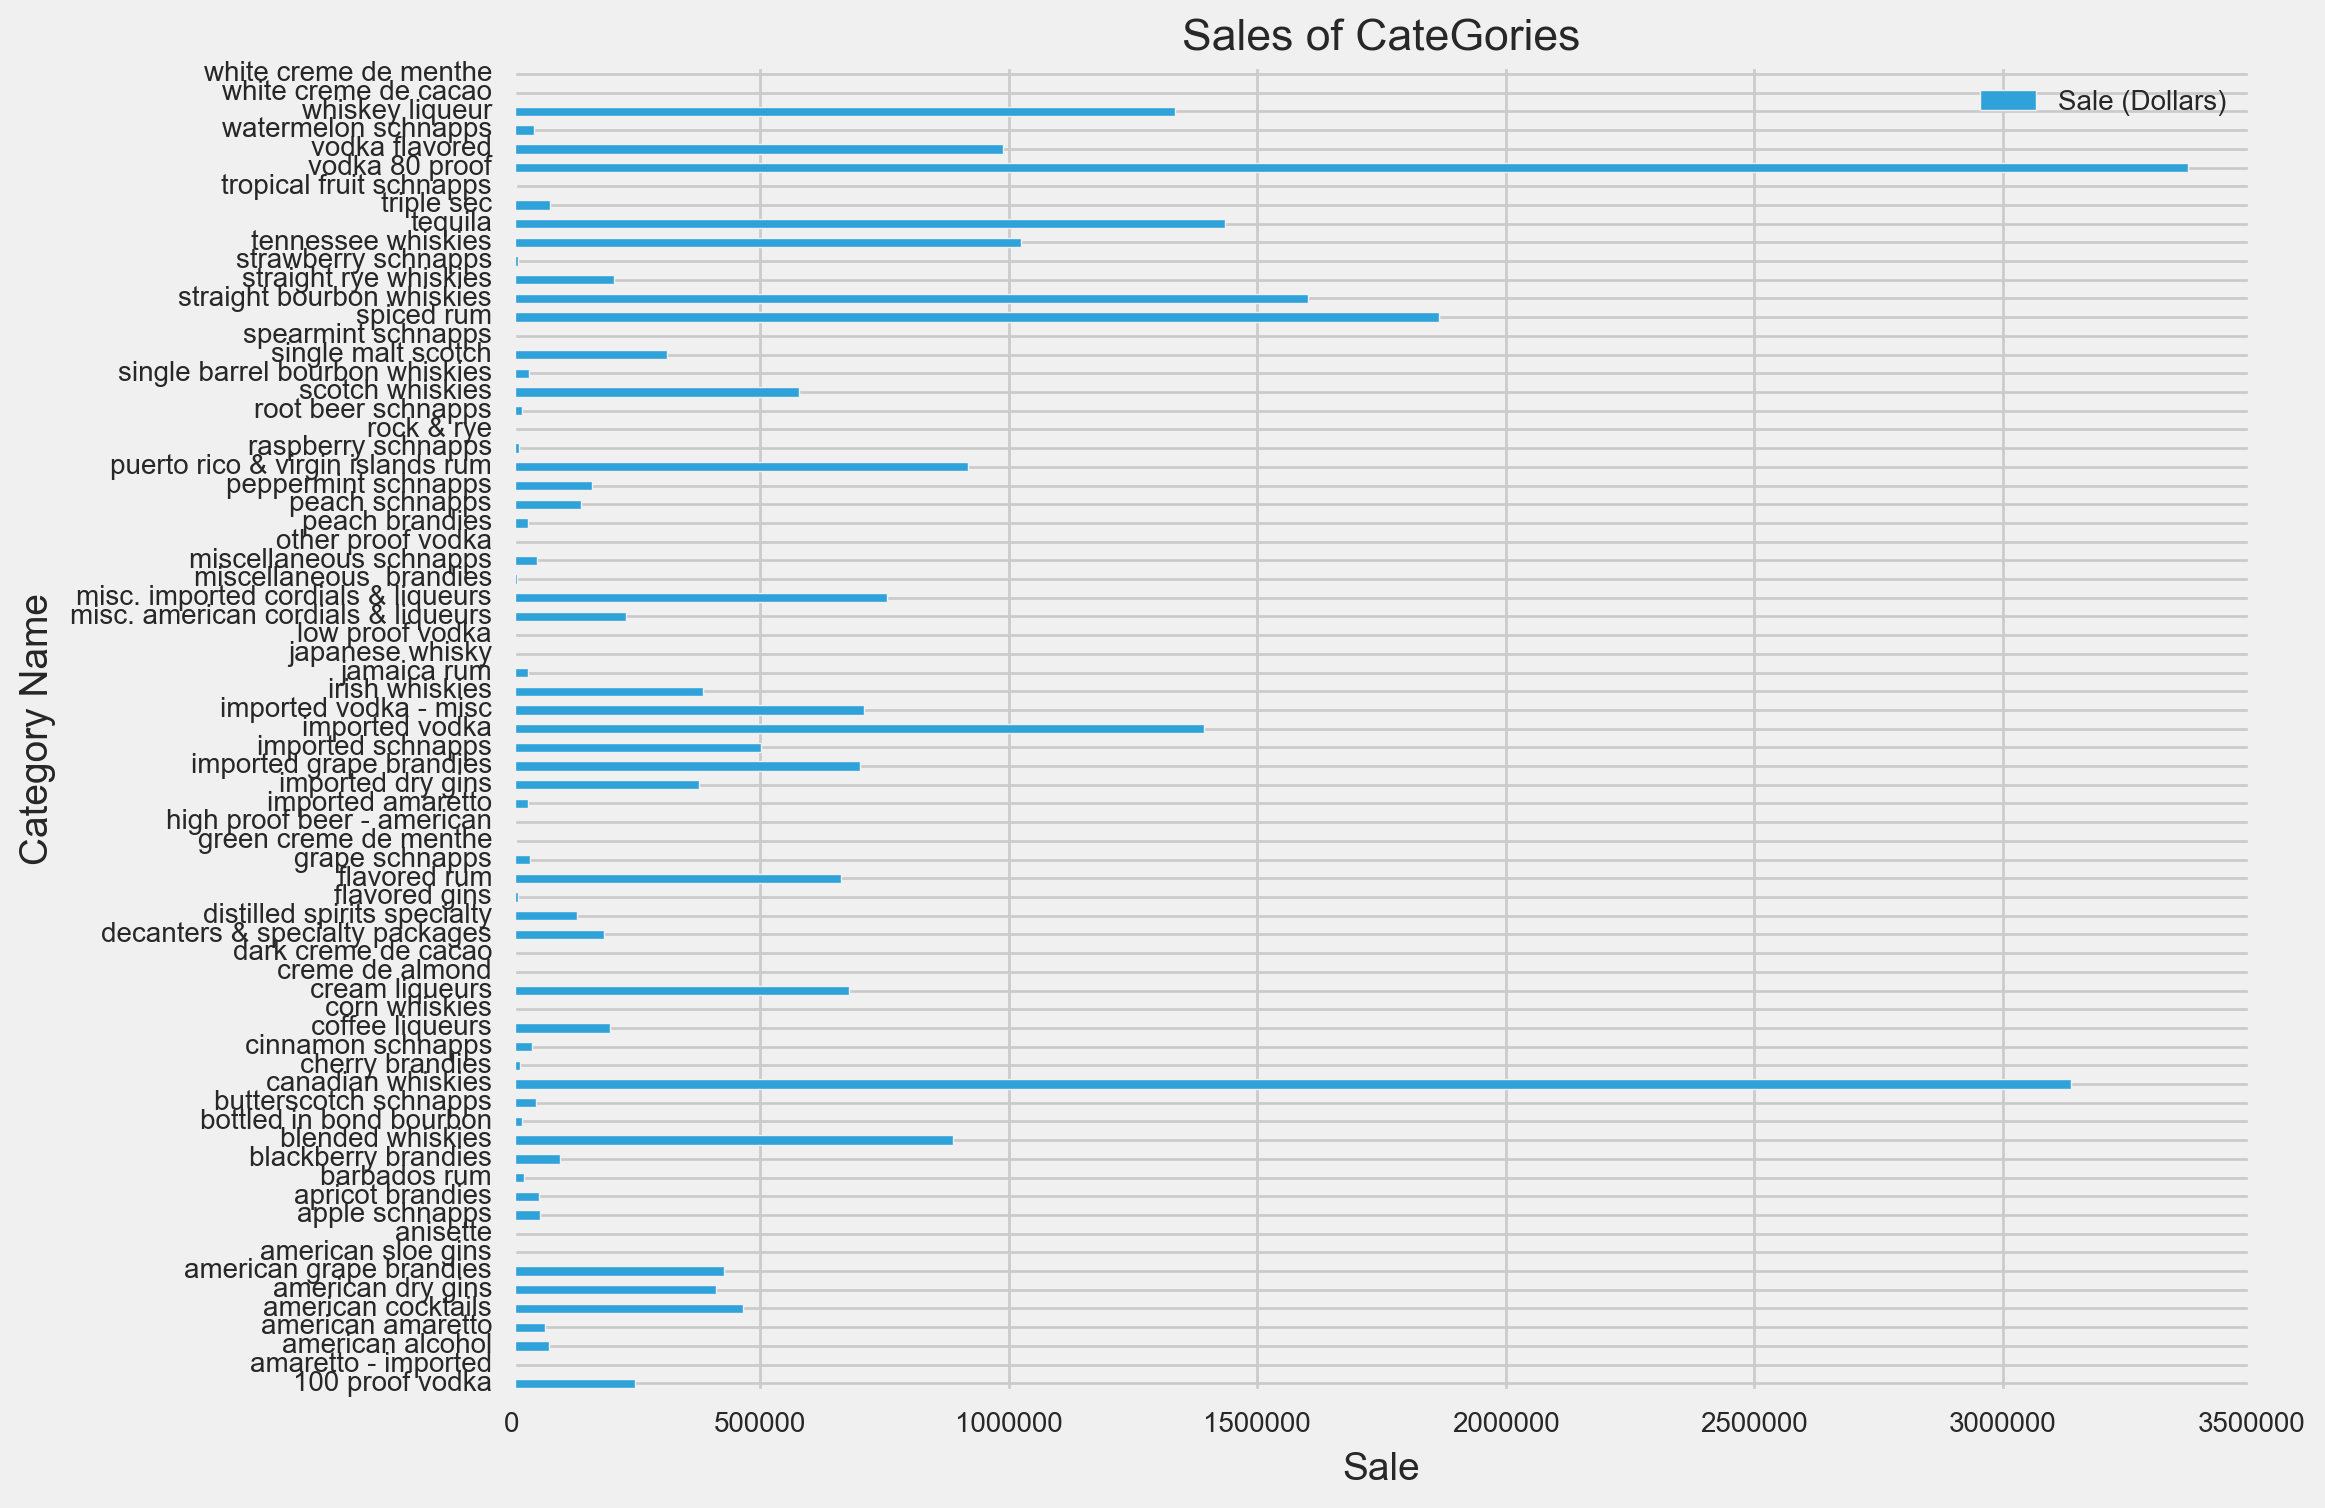

In [47]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)


df5_a.plot(kind="barh",ax=ax)
plt.xlabel("Sale", fontsize=14)
plt.ylabel("Category Name", fontsize=14)
plt.title('Sales of CateGories', fontsize=16)
plt.show()

### There are big gap in sales for different categories


### 5.8 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

### We develop a tax, depends on the product of percentage of alcohol and the volume sold.

Since the sold is related to the size of the shop, so a tax based on the sale as well as on profit will absolutly punish the bigger stores.  
Developing a tax based on the alchohol contained in the goods(It is not likely doable), can defferienciate beer form hard alchohol Liquor.
With this in mind, consumers who bought cocktails should be change less than thoes who bought whisky.(Whisky contain more alcholool) 




## 6. Case 2 = Market research for new store locations (Can't work through this part, yet)

A liquor store owner in Iowa is looking to open a store in a new location and has hired you as a consultant to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [48]:
timeStamp = int(time.mktime(timeArray))


NameError: name 'time' is not defined

In [ ]:
df1=df.groupby([df['County Number']]).sum()
df1.head()

### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?